<a href="https://colab.research.google.com/github/Aleksandrovna15/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module E - Alisa Fedorova**

3.2 Continuity and Differentiation
*   Limits are used to describe continuity, derivatives, and itegrals and are mostly used in calculus and mathematical analysis

In [1]:
from sympy import *

x = symbols('x')
expr = cos(x)/x;
limit_expr = limit(expr, x, 0)

print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = sin(x)/x;
limit_expr = limit(expr, x, 0)

print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

expr = sin(12*x)/x;
limit_expr = limit(expr, x, 0)

print("Limit as " + str(expr) + " approaches 0 : " + str(limit_expr))

Limit as cos(x)/x approaches 0 : oo
Limit as sin(x)/x approaches 0 : 1
Limit as sin(12*x)/x approaches 0 : 12


*   Derivative of a function measures the sensitivity to change of the function value with respect to another variable.
*   The derivative is closely tied withe limits since we can use d*f*(x_0)/dx to find the derivative of *f*(x_0).

In [4]:
# An example of using python library sympy to find the derivatives of several functions
from sympy import *

x, y = symbols('x y')
expr = x**2 + 6 * y + y**3
expr_diff = Derivative(expr, x)

print("Derivative of " +str(expr) + " with respect to x : " + str(expr_diff))
print("Value of the derivative : " + str(expr_diff.doit()))

expr_diff = Derivative(expr, y)

print("Derivative of " +str(expr) + " with respect to y : " + str(expr_diff))
print("Value of the derivative : " + str(expr_diff.doit()))

Derivative of x**2 + y**3 + 6*y with respect to x : Derivative(x**2 + y**3 + 6*y, x)
Value of the derivative : 2*x
Derivative of x**2 + y**3 + 6*y with respect to y : Derivative(x**2 + y**3 + 6*y, y)
Value of the derivative : 3*y**2 + 6


*   Rolle Theorem
  * Let f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b). If f (a) = f (b), then there is a < c < b such that f ′(c) = 0
*   Mean Value Theorem
  *  Let f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b). Then there is a < c < b such that (f (b) - f (a))/b - a = f ′(c)
*   Chain Rule - allows for faster differentiation and recursive differentiation of more complex functions.
*   The directional derivative of a multivariate differentiable (scalar) function along a given vector intuitively measure the rate of change of a function along the direction.

Taylor's Theorem
*   gives an approximation of a differentiable function around a given point by a polynomial
*   a very powerful generalization of the Mean Value Theorem that provides polynomial approximation to a function around a point.

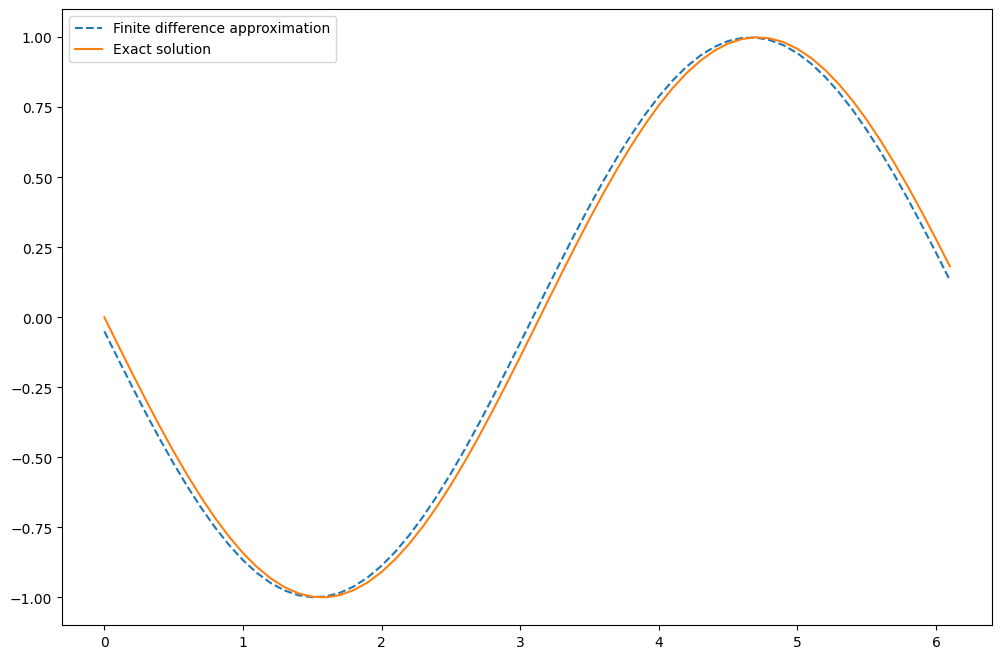

Max Error: 0.049984407218554114


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

h = 0.1                       # step size
x = np.arange(0, 2*np.pi, h)  # define grid
y = np.cos(x)                 # compute function

forward_diff = np.diff(y)/h       # compute vector of forward differences
x_diff = x[:-1:]                  # compute corresponding grid
exact_solution = -np.sin(x_diff)  # compute exact solution

# Plot
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution,     label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print("Max Error: " + str(max_error))

3.3 Unconstrained Optimization
*   Global minimizer - Let f : Rd → R. The point x* ∈ R^d is a global minimizer of f over R^d if f (x) ≥ f (x*), ∀x ∈ Rd.
   * can be seen as the lowest point of the function
*   Local minimizer - Let f : Rd → R. The point x∗ ∈ Rd is a local minimizer of f over Rd if there is δ > 0 such that f (x) ≥ f (x∗), ∀x ∈ B δ (x∗) \ {x*}.
   * lowest point compared to nearby values but not necesserally the lower point of the function


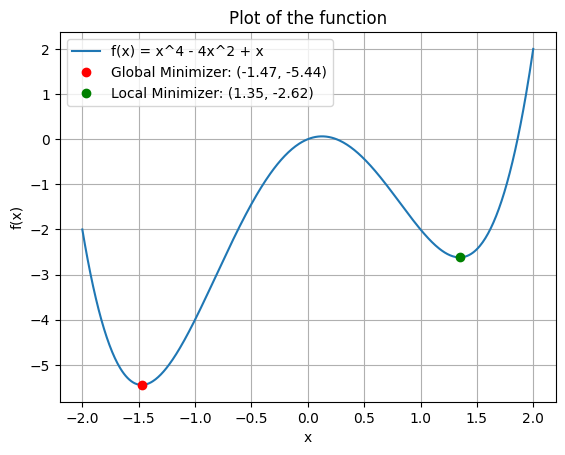

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function
def f(x):
    return x**4 - 4*x**2 + x

# Generate x values for plotting
x_values = np.linspace(-2, 2, 500)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label='f(x) = x^4 - 4x^2 + x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.grid(True)
plt.legend()

# Find global minimum using optimization
result_global = minimize(f, x0=0)  # Start from x=0
x_global_min = result_global.x
y_global_min = result_global.fun

# Plot global minimum
plt.plot(x_global_min, y_global_min, 'ro', label=f'Global Minimizer: ({x_global_min[0]:.2f}, {y_global_min:.2f})')

# Find local minimum using optimization (starting from x=2)
result_local = minimize(f, x0=2)
x_local_min = result_local.x
y_local_min = result_local.fun

# Plot local minimum
plt.plot(x_local_min, y_local_min, 'go', label=f'Local Minimizer: ({x_local_min[0]:.2f}, {y_local_min:.2f})')
plt.legend()
plt.show()

Gradient Descent
*   an iterative optimization algorithm for finding a local minimum of a differentiable function. Once we know a function has a mini-mizer, we will discuss a class of algorithms known as gradient descent method for solving optimization problems numerically
*   The steepest descent approach is to find smaller values of f by successively
following directions in which f decreases.